## Data Analysis with pandas

We are going to examine data from the [Bangalore Open Data Repository](https://github.com/openbangalore/bangalore). Bangalore is the 3rd most populous city in India and widely regarded as the Silicon Valley of India.

### Task 1 - Load Data

- Read in the data to pandas
- Check the shape of the dataframe
- Check the summary statistics of the dataframe
- Change the row index to the "Year" column

In [1]:
% matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Read in the data to pandas
bw = pd.read_csv("bangalore_temparature.tsv", sep='\t')

In [4]:
#Check the shape of the dataframe
bw.shape

(102, 13)

In [5]:
#Check the summary statistics of the dataframe
bw.describe()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,1951.500000,22.122088,24.028069,26.375049,27.844608,27.108118,24.923186,23.985824,24.125373,24.347304,24.100167,22.882186,21.759961
std,29.588849,0.617820,0.732336,0.656179,0.558630,0.636558,0.547904,0.485182,0.373501,0.520555,0.458388,0.581238,0.554744
min,1901.000000,20.699000,22.145000,24.791000,26.725000,25.378000,23.621000,22.770000,23.090000,23.189000,22.838000,21.693000,20.648000
25%,1926.250000,21.768250,23.502250,25.965000,27.452000,26.691500,24.601000,23.620000,23.856000,23.977500,23.827000,22.438250,21.313000
50%,1951.500000,22.187000,24.074000,26.462500,27.899000,27.231000,24.932500,24.022500,24.080500,24.351000,24.149500,22.934500,21.826500
75%,1976.750000,22.476750,24.534000,26.748500,28.213750,27.579250,25.250750,24.293500,24.430250,24.685500,24.354000,23.234000,22.114250
max,2002.000000,23.530000,26.134000,28.048000,29.068000,28.272000,26.427000,25.190000,25.019000,25.869000,25.413000,24.478000,23.124000


In [6]:
#Change the row index to the "Year" column
bw.set_index("Year", inplace=True)
bw.head()
bw.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1998,23.530,25.724,27.917,28.908,28.075,26.259,24.553,24.761,24.589,24.509,23.909,22.483
1999,22.705,24.466,27.490,27.890,25.822,24.771,24.242,24.562,25.224,24.696,23.533,22.087
2000,23.174,25.028,26.542,28.090,26.859,24.388,24.063,24.067,24.906,24.339,23.752,21.900
2001,23.196,26.063,27.427,28.128,27.404,25.160,24.729,24.162,25.323,24.208,23.774,22.207
2002,23.349,24.130,27.284,28.559,27.501,25.285,24.931,24.718,25.869,25.093,23.670,22.776


### Task 2 - Initial Data Analysis

- (Chart) How does temperature vary over the year (X-axis is months)?
- (Chart) How does temperature vary over the years (X-axis is years)?
- Which months had the highest and lowest temperatures in 1960?
- What were the highest, lowest and mean values in 1960?
- Where were the highest, lowest and mean values in an arbitray year (hint: write a function)?
- Which months had the highest and lowest gains in temperature?
- Make a histogram, KDE plot and bar plot of the gains.

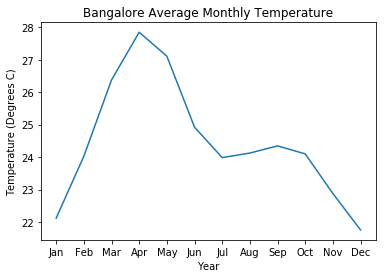

In [7]:
#(Chart) How does temperature vary over the year (X-axis is months)?

months = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]

mon_mean = bw.mean(axis = 0)
mon_mean

plt.plot(mon_mean)
plt.xlabel("Year")
plt.ylabel("Temperature (Degrees C)")
plt.title("Bangalore Average Monthly Temperature")
plt.show()




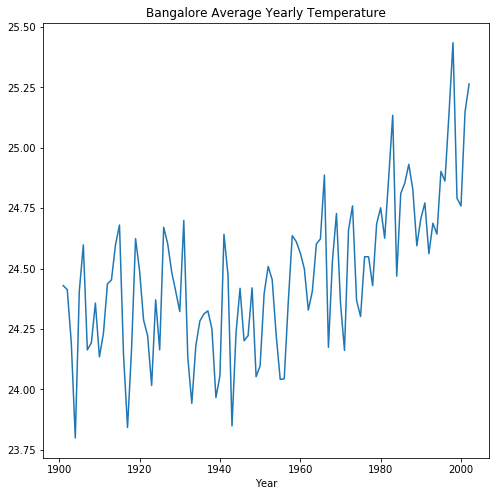

In [8]:
#(Chart) How does temperature vary over the years (X-axis is years)?
year_mean = bw.mean(axis = 1)
year_mean
year_mean.plot(figsize=(8,8), title="Bangalore Average Yearly Temperature")

In [9]:
# Which months had the highest and lowest temperatures in 1960?

print(bw.loc[1960].idxmin(), "had the lowest average temperature in 1960")
print(bw.loc[1960].idxmax(), "had the highest average temperature in 1960")

Dec had the lowest average temperature in 1960
Apr had the highest average temperature in 1960


In [10]:
#What were the highest, lowest and mean values in 1960?
print("The highest average monthly temperature in 1960 was", bw.loc[1960].max())
print("The lowest average monthly temperature in 1960 was", bw.loc[1960].min())
print("The mean average monthly temperature in 1960 was", bw.loc[1960].mean())

The highest average monthly temperature in 1960 was 28.142
The lowest average monthly temperature in 1960 was 21.814
The mean average monthly temperature in 1960 was 24.564083333333333


In [11]:
#Where were the highest, lowest and mean values in an arbitray year (hint: write a function)?

import random

def weather_stats(data_set):
    y = data_set.shape
    num = random.randint(1,y[0])
    year = bw.index[num]
    print("The highest average monthly temperature in", year, "was", bw.loc[year].max())
    print("The lowest average monthly temperature in", year, "was", bw.loc[year].min())
    print("The mean average monthly temperature in", year, "was", bw.loc[year].mean())

weather_stats(bw)    
    

The highest average monthly temperature in 1958 was 27.892
The lowest average monthly temperature in 1958 was 21.805999999999997
The mean average monthly temperature in 1958 was 24.63608333333333


### Task 3 - Visualization

matplotlib
- Make a histogram for a particular month.
- Compare distributions for 2 months (histograms on subplots).
- Compare two years in the same histogram (use color coding).
- Define a function to compare two months in the same frame.
- Create a box plot for 1 month.
- Create a box plot for 2 months on 1 figure.
- Create a function that compares 2 months via boxplot.

seaborn
- Make a KDE plot of one month.
- Make a function that compares the KDE plots of 2 months.
- Compare the histogram and KDE plots of 2 months on the same figure.
- Create a Facetgrid version of the KDE plots. Loop through a months array.
- Create a violin plot for 1 month.
- Create a violin plot for 2 months on 1 figure.
- Create a function that compares 2 months via violin plot.

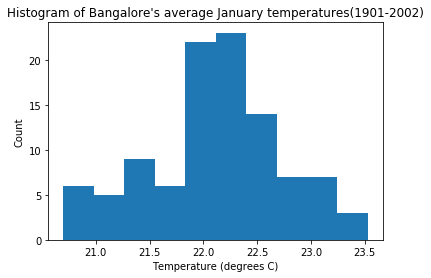

In [12]:
#Make a histogram for a particular month.

plt.hist(bw.iloc[:,0])
plt.title("Histogram of Bangalore's average January temperatures(1901-2002)")
plt.xlabel("Temperature (degrees C)")
plt.ylabel("Count")
plt.show()

Text(0,0.5,'Count')

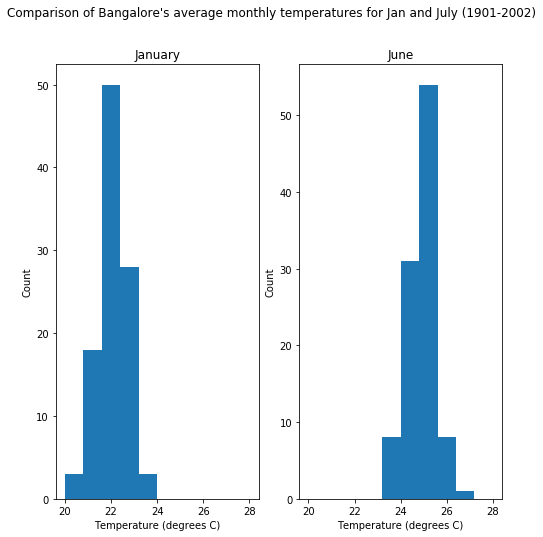

In [13]:
#Compare distributions for 2 months (histograms on subplots).

fig = plt.figure(figsize=(8,8))
fig.suptitle("Comparison of Bangalore's average monthly temperatures for Jan and July (1901-2002)")
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(bw.iloc[:,0], range=(20,28))
ax1.set_title("January")
ax1.set_xlabel("Temperature (degrees C)")
ax1.set_ylabel("Count")
ax2.hist(bw.iloc[:,5], range=(20,28))
ax2.set_title("June")
ax2.set_xlabel("Temperature (degrees C)")
ax2.set_ylabel("Count")




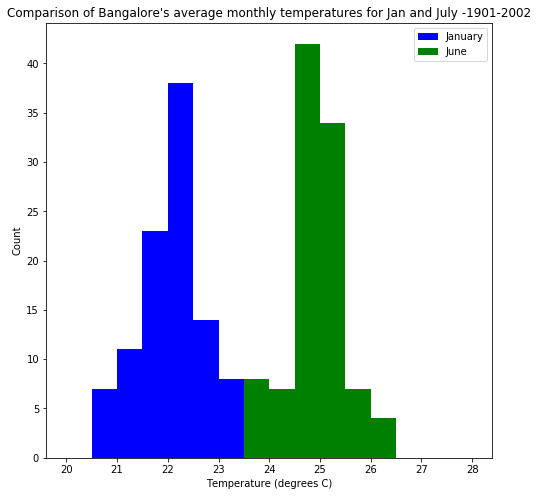

In [14]:
#Compare two years in the same histogram (use color coding).
plt.figure(figsize=(8,8))
plt.title("Comparison of Bangalore's average monthly temperatures for Jan and July -1901-2002")
plt.hist(bw.iloc[:,0], range=(20,28), bins=16, color="b", label="January")
plt.hist(bw.iloc[:,5], range=(20,28), bins=16, color="g", label = "June")
plt.xlabel("Temperature (degrees C)")
plt.ylabel("Count")
plt.legend()




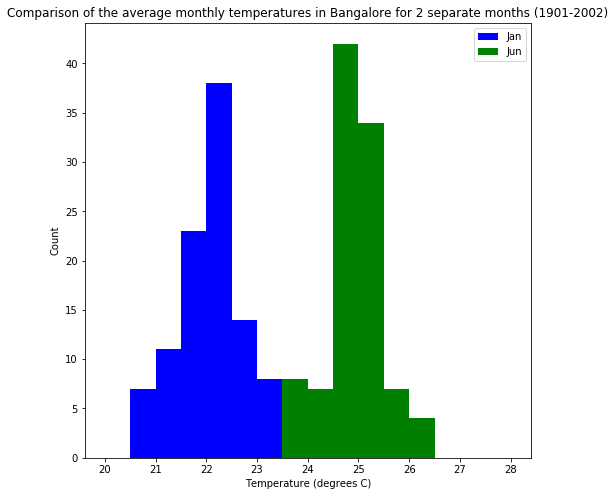

In [15]:
#Define a function to compare two months in the same frame.
def comp_months_hist(data_set, month1, month2):
    fig = plt.figure(figsize=(8,8))
    plt.title("Comparison of the average monthly temperatures in Bangalore for 2 separate months (1901-2002)")
    plt.hist(data_set.loc[:,month1], range=(20,28), bins=16, color="b", label=month1)
    plt.hist(data_set.loc[:,month2], range=(20,28), bins=16, color="g", label=month2)
    plt.xlabel("Temperature (degrees C)")
    plt.ylabel("Count")
    plt.legend()  

comp_months_hist(bw, "Jan", "Jun")    
        
        
    

In [1]:
#Create a box plot for 1 month
plt.boxplot(bw.iloc[:,0], labels=["Jan"])
plt.title("Box Plot of Bangalore's average January temperatures (1901-2002)")
plt.ylabel("Temperature (degrees C)")
plt.show()

NameError: name 'plt' is not defined

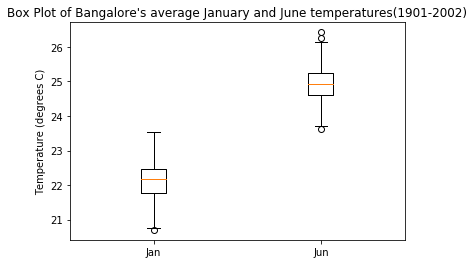

In [17]:
#Create a box plot for 2 months on 1 figure.
plt.boxplot([bw.iloc[:,0], bw.iloc[:,5]], labels=["Jan", "Jun"])
plt.title("Box Plot of Bangalore's average January and June temperatures (1901-2002)")
plt.ylabel("Temperature (degrees C)")
plt.show()

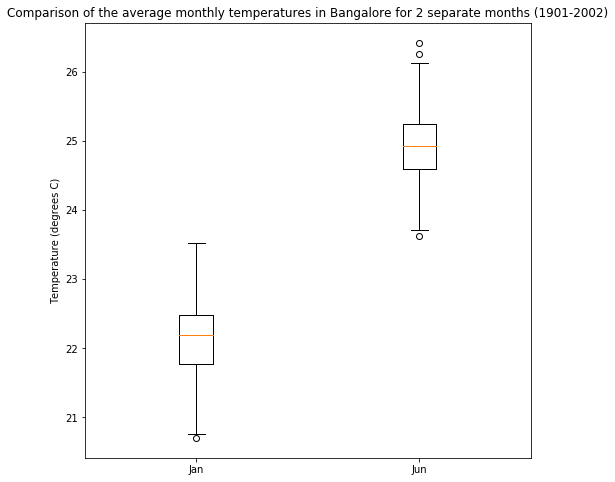

In [18]:
#Create a function that compares 2 months via boxplot.
def comp_months_box(data_set, month1, month2):
    fig = plt.figure(figsize=(8,8))
    plt.title("Comparison of the average monthly temperatures in Bangalore for 2 separate months (1901-2002)")
    plt.boxplot([data_set.loc[:,month1], data_set.loc[:,month2]], labels=[month1, month2])
    plt.ylabel("Temperature (degrees C)") 

comp_months_box(bw, "Jan", "Jun") 

Text(0.5,0,'Temperature (degrees C)')

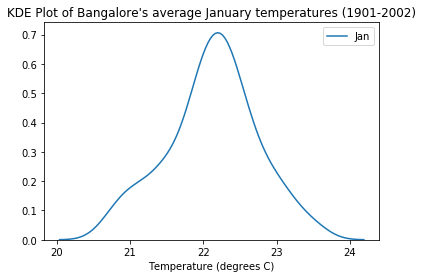

In [19]:
#Make a KDE plot of one month.
import seaborn as sns

ax = sns.kdeplot(bw.iloc[:,0])
ax.set_title("KDE Plot of Bangalore's average January temperatures (1901-2002)")
ax.set_xlabel("Temperature (degrees C)")


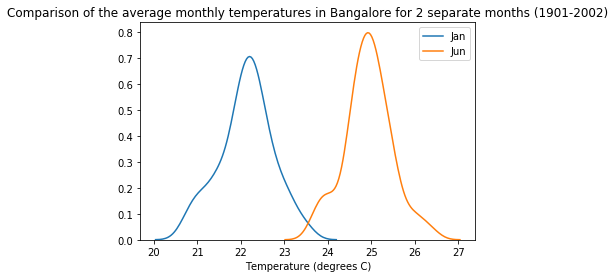

In [20]:
#Make a function that compares the KDE plots of 2 months.
def comp_months_kde(data_set, month1, month2):
    sns.kdeplot(data_set.loc[:,month1])
    ax = sns.kdeplot(data_set.loc[:,month2])
    ax.set_title("Comparison of the average monthly temperatures in Bangalore for 2 separate months (1901-2002)")
    ax.set_xlabel("Temperature (degrees C)")
    
comp_months_kde(bw, "Jan", "Jun")


/Users/ajwright/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/ajwright/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


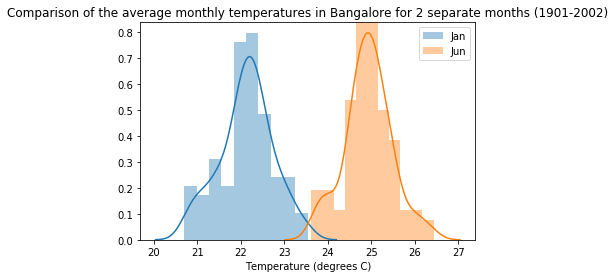

In [21]:
#Compare the histogram and KDE plots of 2 months on the same figure.

def comp_months_dist(data_set, month1, month2):
    sns.distplot(data_set.loc[:,month1], label=month1)
    ax = sns.distplot(data_set.loc[:,month2], label=month2)
    ax.set_title("Comparison of the average monthly temperatures in Bangalore for 2 separate months (1901-2002)")
    ax.set_xlabel("Temperature (degrees C)")
    ax.legend()
    
comp_months_dist(bw, "Jan", "Jun")


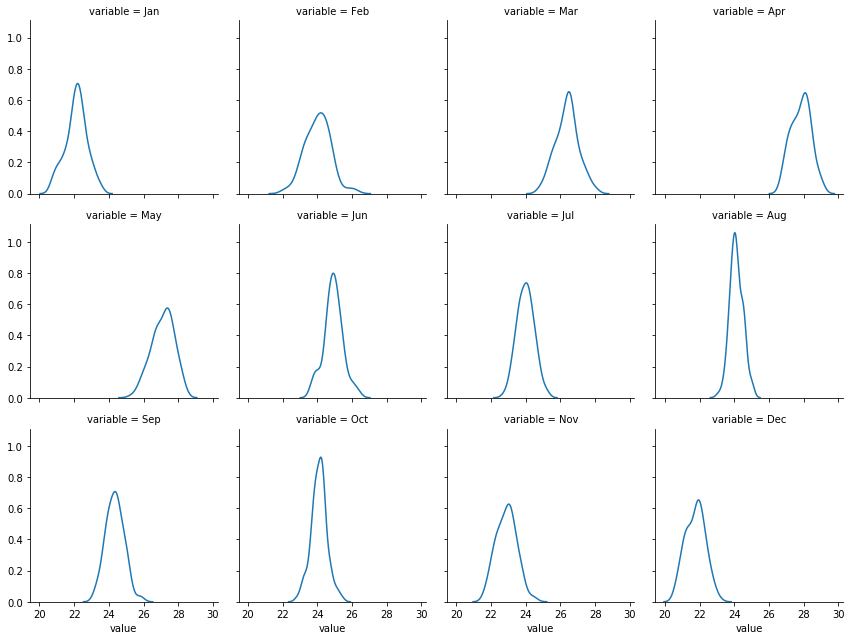

In [29]:
#Create a Facetgrid version of the KDE plots. Loop through a months array.
bw_year = bw.reset_index()
col_list = list(bw)
bw_config = pd.melt(bw_year, id_vars="Year", value_vars = col_list)


g = sns.FacetGrid(bw_config, col="variable", col_wrap=4)
g.map(sns.kdeplot, "value")

In [45]:
bw_config.head()

,Year,variable,value
0,1901,Jan,23.094
1,1902,Jan,21.588
2,1903,Jan,22.296
3,1904,Jan,20.982
4,1905,Jan,21.740


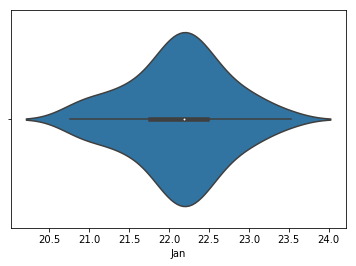

In [30]:
#Create a violin plot for 1 month.
sns.violinplot(bw.iloc[:,0])

Text(0,0.5,'')

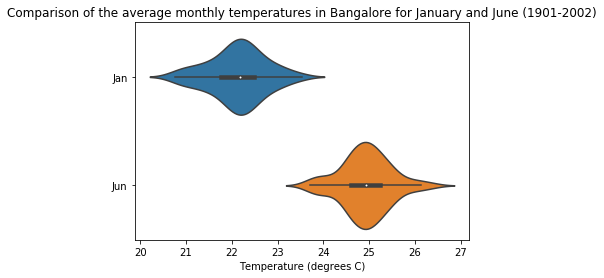

In [59]:
#Create a violin plot for 2 months on 1 figure.

bw_temp = bw_config.loc[bw_config['variable'].isin(["Jan", "Jun"])]

ax = sns.violinplot(x=bw_temp["value"], y=bw_temp["variable"])
ax.set_title("Comparison of the average monthly temperatures in Bangalore for January and June (1901-2002)")
ax.set_xlabel("Temperature (degrees C)")
ax.set_ylabel("")

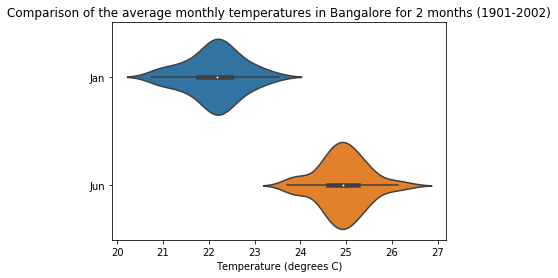

In [64]:
#Create a function that compares 2 months via violin plot.

def comp_months_violin(data_set, month1, month2):
    bw_temp_func = data_set.loc[data_set['variable'].isin([month1, month2])]
    ax = sns.violinplot(x=bw_temp_func["value"], y=bw_temp_func["variable"])
    ax.set_title("Comparison of the average monthly temperatures in Bangalore for 2 months (1901-2002)")
    ax.set_xlabel("Temperature (degrees C)")
    ax.set_ylabel("")
    
comp_months_violin(bw_config, "Jan", "Jun")

### Task 4 - Insight

- Visually represent the varying temperatures over the entire period.
- Find the coldest and warmest months for May over the entire period.

Text(0.5,1,'Average monthly temperatures in Bangalore (1901-2002) with plot of yearly average')

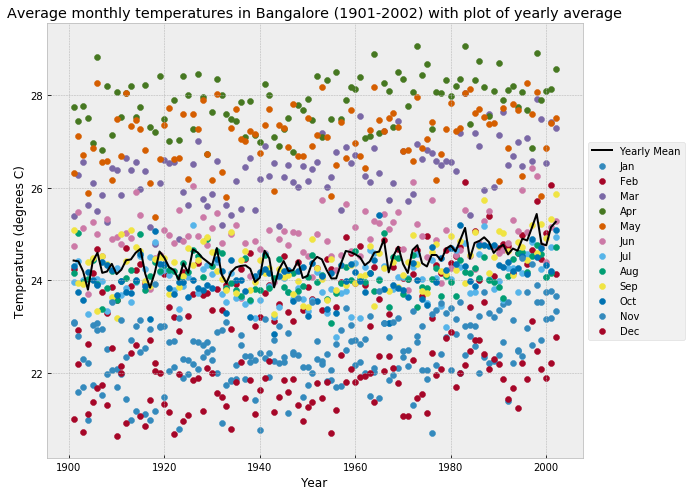

In [104]:
#Visually represent the varying temperatures over the entire period.

plt.style.use("bmh")
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(111)
ax = year_mean.plot(color="black", label='Yearly Mean', ) 
for mon in col_list:
    ax.scatter(bw_year["Year"], bw_year[mon], label=mon)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel("Temperature (degrees C)")
plt.title("Average monthly temperatures in Bangalore (1901-2002) with plot of yearly average")

   

In [102]:
#Find the coldest and warmest months for May over the entire period.



print(bw["May"].idxmin(), "had the lowest average temperature for the month of May")
print(bw["May"].idxmax(), "had the highest average temperature for the month of May")

1918 had the lowest average temperature for the month of May
1906 had the highest average temperature for the month of May
